I studied Principal Component Analysis in my Multivariate Statistics course at IIT Delhi and learned how to apply it on a basic data set on my own.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler as SS

In [ ]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12, 8)

In [ ]:
iris = pd.read_csv("Iris.csv")

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris = iris.drop(columns = ['Id'], axis = 1)

In [ ]:
print(iris.isna().sum())
iris.columns = ['sepal_len', 'sepal_width', 'petal_len', 'petal_width', 'species']

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepal_len    150 non-null    float64
 1   sepal_width  150 non-null    float64
 2   petal_len    150 non-null    float64
 3   petal_width  150 non-null    float64
 4   species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


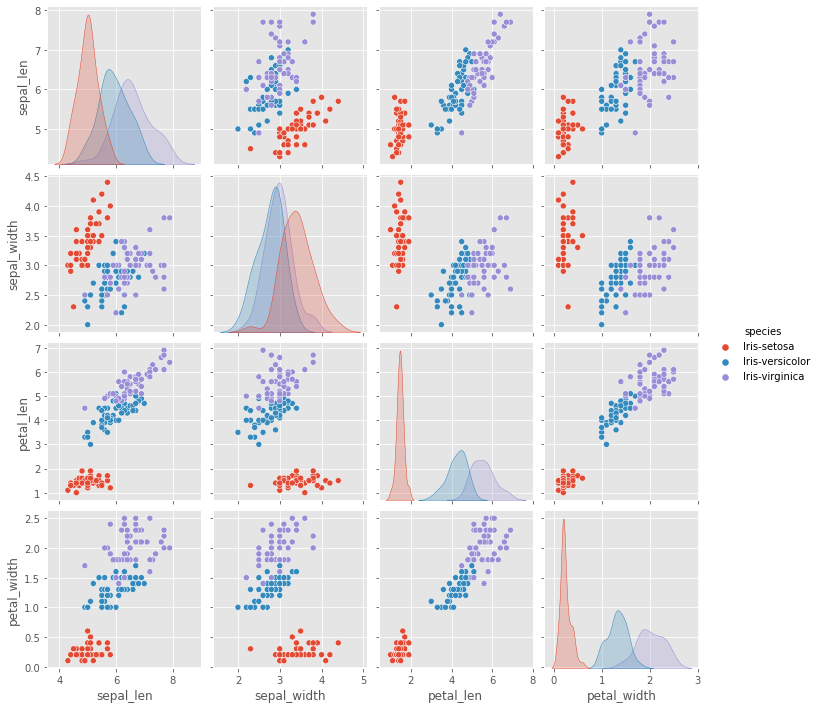

In [ ]:
sns.pairplot(iris, hue = 'species')

In [ ]:
X = iris.iloc[:, 0:4].values
y = iris.species.values

In [ ]:
X = SS().fit_transform(X)

In [ ]:
cov = np.cov(X.T) #symmetric positive matrix
cov

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [ ]:
# covariance matrix will be breaking in W D W^-1 (eigendecomposition)
# columns of W = eigenvectors (principal components)
# diagonal values of D = eigenvalues
# basis vectors gives orthogonal axis or direction in the new feature space
# eigenvalues are the maginitude in that direction
eig_val, eig_vec = np.linalg.eig(cov)
print(eig_val)
print(eig_vec)

[2.93035378 0.92740362 0.14834223 0.02074601]
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [ ]:
eig_vec_svd, s, v = np.linalg.svd(cov)
print(eig_vec_svd)

[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]


In [ ]:
import numpy as np
-0.52237162/np.sqrt(0.52237162 **2 + 0.26335492**2 + 0.58125401**2 + 0.56561105**2)

-0.5223716180952207

In [ ]:
# picking principal components with explained ratio
for val in eig_val:
  print(val)

2.930353775589317
0.9274036215173428
0.14834222648163967
0.020746013995595967


In [ ]:
variance_explained = [(i/sum(eig_val))*100 for i in eig_val]
variance_explained

[72.77045209380132, 23.03052326768066, 3.6838319576273824, 0.5151926808906327]

In [ ]:
cumulative_var_explained = np.cumsum(variance_explained)
cumulative_var_explained

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

Text(0.5, 1.0, 'Explained Ratio')

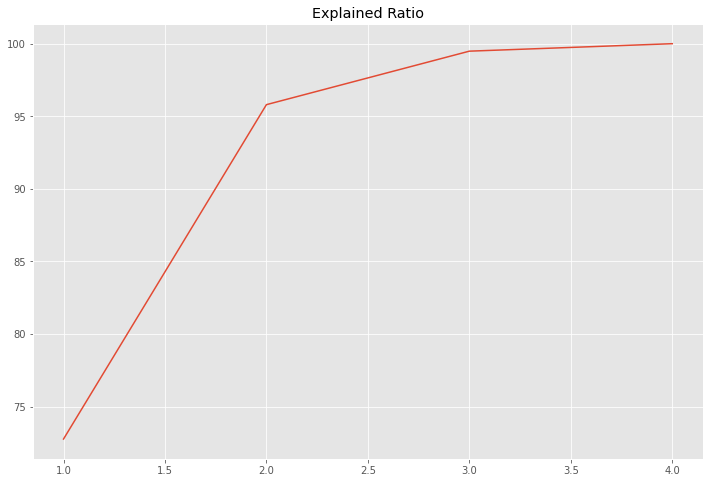

In [ ]:
sns.lineplot(x = [1, 2, 3, 4], y = cumulative_var_explained)
plt.title("Explained Ratio")

In [ ]:
# X(pca) == X . W
projection_matrix = (eig_vec.T[:][:])[:2].T
print(projection_matrix)

[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [ ]:
X_pca = X.dot(projection_matrix)
X_pca

array([[-2.26454173e+00, -5.05703903e-01],
       [-2.08642550e+00,  6.55404729e-01],
       [-2.36795045e+00,  3.18477311e-01],
       [-2.30419716e+00,  5.75367713e-01],
       [-2.38877749e+00, -6.74767397e-01],
       [-2.07053681e+00, -1.51854856e+00],
       [-2.44571134e+00, -7.45626750e-02],
       [-2.23384186e+00, -2.47613932e-01],
       [-2.34195768e+00,  1.09514636e+00],
       [-2.18867576e+00,  4.48629048e-01],
       [-2.16348656e+00, -1.07059558e+00],
       [-2.32737775e+00, -1.58587455e-01],
       [-2.22408272e+00,  7.09118158e-01],
       [-2.63971626e+00,  9.38281982e-01],
       [-2.19229151e+00, -1.88997851e+00],
       [-2.25146521e+00, -2.72237108e+00],
       [-2.20275048e+00, -1.51375028e+00],
       [-2.19017916e+00, -5.14304308e-01],
       [-1.89407429e+00, -1.43111071e+00],
       [-2.33994907e+00, -1.15803343e+00],
       [-1.91455639e+00, -4.30465163e-01],
       [-2.20464540e+00, -9.52457317e-01],
       [-2.77416979e+00, -4.89517027e-01],
       [-1.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


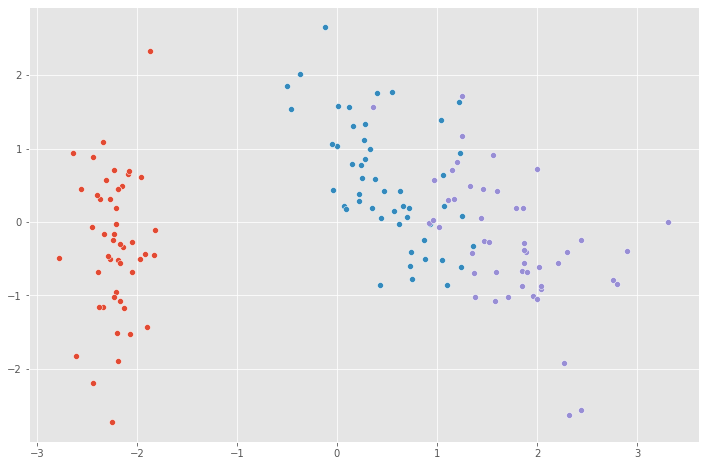

In [ ]:
for s in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
  sns.scatterplot(X_pca[y == s, 0], y = X_pca[y == s, 1])